In [31]:
#IMPORTING LIBRARIES
#Import all the libraries to be used in this notebook. I prefer to do this at the initial stage and added more libraries as I went along on the project

In [29]:
!pip install pandas
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install pycountry
!pip install syspath
!pip install matplotlib
!pip install pandas 
!pip install numpy 
!pip install nltk
!pip install regex
!pip install langdetect
!pip install sklearn

In [2]:
from textblob import TextBlob
import sys
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import csv

In [32]:
#Tweets Mining
#I used the Tweepy library for Python to scrape tweets. You need a developer account with Twitter to get the keys used below for this task.

In [33]:
auth = tw.OAuthHandler("35kYFWPLP94tZcP548yxCj2Yp","qWC5t05EzIwefVHrBxlstYmgLFVsI713T41Ef0S3xszNb4DUfA")
auth.set_access_token("992432970211516417-V1VRT5ggemgu9w54EWU4zqv6YFFRBkz","bLYMUsPIL4quvyXRaSV1GQ0Jbx4DRnyivhG9BHnO4T1X7")
api = tw.API(auth, wait_on_rate_limit=True)

In [34]:
search_words = "Ukraine","Russia"
since = "2022-02-20"
query = tw.Cursor(api.search_tweets, q=search_words).items(100)
tweets = [{"Tweets":tweet.text, "Timestamp":tweet.created_at,"tweet_id":tweet.id,"location":tweet.user.location,"retweet":tweet.retweet_count} for tweet in query]
for tweet in query:
    tweets = tweet.text.replace('RT','')
    if tweets.startswith(' @'):
        position = tweets.index(':')
        tweets = tweets[position+2:]
    if tweets.startswith('@'):
        position = tweets.index(' ')
        tweets = tweets[position+2:]
print(tweets)

[{'Tweets': 'RT @DonaldBKipkorir: When CNN reports on Russia - Ukraine War, everything from Russia is propaganda whilst what Ukraine says is never quest…', 'Timestamp': datetime.datetime(2022, 5, 2, 20, 45, 49, tzinfo=datetime.timezone.utc), 'tweet_id': 1521229494442500102, 'location': 'Migori, Macalder', 'retweet': 43}, {'Tweets': "RT @TheRegister: John Deere tractors 'bricked' after Russia steals machinery from Ukraine https://t.co/5qevuWU8mo", 'Timestamp': datetime.datetime(2022, 5, 2, 20, 45, 48, tzinfo=datetime.timezone.utc), 'tweet_id': 1521229491900755969, 'location': 'Manchester, England', 'retweet': 10}, {'Tweets': 'RT @washingtonpost: Big majority of Americans support sanctions on Russia, aid to Ukraine, poll finds https://t.co/1dUvMJRgOB', 'Timestamp': datetime.datetime(2022, 5, 2, 20, 45, 48, tzinfo=datetime.timezone.utc), 'tweet_id': 1521229490151903232, 'location': 'Home for the Day', 'retweet': 115}, {'Tweets': "RT @nolanwpeterson: I had an enlightening conversation w/a 

In [35]:
#Combining all Tweets into single Pandas Dataframe

In [3]:
df=pd.read_csv('Twitter_data2.csv',lineterminator='\n', error_bad_lines=False)

/Users/adityashinde/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/adityashinde/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,5,7,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,6706531,1084518784004542464,Opoyis,High-quality trusted conversations around news...,New Delhi,51,11504.0,59570.0,2019-01-13 18:33:22.000000,1503521359237951488.0,2022-03-15 00:00:00.000000,0.0,#Ukrainian President Volodymyr Zelensky will d...,"[{'text': 'Ukrainian', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:05:30.589243
1,6706532,1158485538690588672,alter_bunso,Call me “bunso” and message ka lang. 🔁,National Capital Region,221,4002.0,3011.0,2019-08-05 21:10:50.000000,1503521359284305920.0,2022-03-15 00:00:00.000000,0.0,Hello pala kay kuyang cute sa may last row. Hu...,[],tl,NaN,3.0,2022-03-15 01:40:56.017229
2,6706534,27741349,RNS,Driving essential conversation about how relig...,USA,19487,92235.0,81081.0,2009-03-30 22:03:40.000000,1503521360286420992.0,2022-03-15 00:00:01.000000,2.0,"""Orthodox priests and deacons within #Ukraine ...","[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",en,NaN,1.0,2022-03-15 00:33:36.807900
3,6706535,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,910967.0,311921.0,2009-02-28 08:31:32.000000,1503521360710193152.0,2022-03-15 00:00:01.000000,0.0,#Australia is imposing new sanctions on 33 Rus...,"[{'text': 'Australia', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:03:27.732329
4,6706536,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",50,3224.0,59218.0,2011-09-08 02:34:54.000000,1503521361192497152.0,2022-03-15 00:00:01.000000,0.0,"As the ongoing conflict in #Ukraine drags on, ...","[{'text': 'Ukraine', 'indices': [27, 35]}, {'t...",en,NaN,0.0,2022-03-15 00:05:30.565579


In [5]:
df.shape

(298524, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298524 entries, 0 to 298523
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      298524 non-null  object 
 1   userid          298519 non-null  object 
 2   username        298519 non-null  object 
 3   acctdesc        270173 non-null  object 
 4   location        298507 non-null  object 
 5   following       298507 non-null  object 
 6   followers       298496 non-null  float64
 7   totaltweets     298496 non-null  object 
 8   usercreatedts   298496 non-null  object 
 9   tweetid         298496 non-null  object 
 10  tweetcreatedts  298496 non-null  object 
 11  retweetcount    298496 non-null  object 
 12  text            298484 non-null  object 
 13  hashtags        298485 non-null  object 
 14  language        298485 non-null  object 
 15  coordinates     665 non-null     object 
 16  favorite_count  298473 non-null  float64
 17  extractedt

In [7]:
df.columns

Index(['Unnamed: 0', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'extractedts'],
      dtype='object')

In [36]:
#Data Cleaning

In [8]:
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adityashinde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stopwords = nltk.corpus.stopwords.words("english")
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words("english")
custom_stopwords = ['RT']
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adityashinde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adityashinde/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/adityashinde/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
#Tweets Processing

In [11]:
def preprocess_tweets(text, custom_stopwords):
    processed_tweet = text
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stopwords)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df["text"] = [str(x).replace(':',' ') for x in df["text"]]

df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,6706531,1084518784004542464,Opoyis,High-quality trusted conversations around news...,New Delhi,51,11504.0,59570.0,2019-01-13 18:33:22.000000,1503521359237951488.0,2022-03-15 00:00:00.000000,0.0,#Ukrainian President Volodymyr Zelensky will d...,"[{'text': 'Ukrainian', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:05:30.589243
1,6706532,1158485538690588672,alter_bunso,Call me “bunso” and message ka lang. 🔁,National Capital Region,221,4002.0,3011.0,2019-08-05 21:10:50.000000,1503521359284305920.0,2022-03-15 00:00:00.000000,0.0,Hello pala kay kuyang cute sa may last row. Hu...,[],tl,NaN,3.0,2022-03-15 01:40:56.017229
2,6706534,27741349,RNS,Driving essential conversation about how relig...,USA,19487,92235.0,81081.0,2009-03-30 22:03:40.000000,1503521360286420992.0,2022-03-15 00:00:01.000000,2.0,"""Orthodox priests and deacons within #Ukraine ...","[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",en,NaN,1.0,2022-03-15 00:33:36.807900
3,6706535,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,910967.0,311921.0,2009-02-28 08:31:32.000000,1503521360710193152.0,2022-03-15 00:00:01.000000,0.0,#Australia is imposing new sanctions on 33 Rus...,"[{'text': 'Australia', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:03:27.732329
4,6706536,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",50,3224.0,59218.0,2011-09-08 02:34:54.000000,1503521361192497152.0,2022-03-15 00:00:01.000000,0.0,"As the ongoing conflict in #Ukraine drags on, ...","[{'text': 'Ukraine', 'indices': [27, 35]}, {'t...",en,NaN,0.0,2022-03-15 00:05:30.565579


In [12]:
def preprocess_tweets(text, custom_stopwords):
    processed_tweet = text
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stopwords)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['processed_tweet'] = df['text'].apply(lambda x: preprocess_tweets(x, custom_stopwords))

df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,processed_tweet
0,6706531,1084518784004542464,Opoyis,High-quality trusted conversations around news...,New Delhi,51,11504.0,59570.0,2019-01-13 18:33:22.000000,1503521359237951488.0,2022-03-15 00:00:00.000000,0.0,#Ukrainian President Volodymyr Zelensky will d...,"[{'text': 'Ukrainian', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:05:30.589243,#Ukrainian President Volodymyr Zelensky delive...
1,6706532,1158485538690588672,alter_bunso,Call me “bunso” and message ka lang. 🔁,National Capital Region,221,4002.0,3011.0,2019-08-05 21:10:50.000000,1503521359284305920.0,2022-03-15 00:00:00.000000,0.0,Hello pala kay kuyang cute sa may last row. Hu...,[],tl,NaN,3.0,2022-03-15 01:40:56.017229,Hello pala kay kuyang cute sa may last row. Hu...
2,6706534,27741349,RNS,Driving essential conversation about how relig...,USA,19487,92235.0,81081.0,2009-03-30 22:03:40.000000,1503521360286420992.0,2022-03-15 00:00:01.000000,2.0,"""Orthodox priests and deacons within #Ukraine ...","[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",en,NaN,1.0,2022-03-15 00:33:36.807900,"""Orthodox priest deacon within #Ukraine elsewh..."
3,6706535,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,910967.0,311921.0,2009-02-28 08:31:32.000000,1503521360710193152.0,2022-03-15 00:00:01.000000,0.0,#Australia is imposing new sanctions on 33 Rus...,"[{'text': 'Australia', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:03:27.732329,#Australia imposing new sanction 33 Russian ol...
4,6706536,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",50,3224.0,59218.0,2011-09-08 02:34:54.000000,1503521361192497152.0,2022-03-15 00:00:01.000000,0.0,"As the ongoing conflict in #Ukraine drags on, ...","[{'text': 'Ukraine', 'indices': [27, 35]}, {'t...",en,NaN,0.0,2022-03-15 00:05:30.565579,"As ongoing conflict #Ukraine drag on, #African..."


In [13]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df['Subjectivity']=df['processed_tweet'].apply(getSubjectivity)
df['Polarity']=df['processed_tweet'].apply(getPolarity)
## show new Dataframe
df

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,processed_tweet,Subjectivity,Polarity
0,6706531,1084518784004542464,Opoyis,High-quality trusted conversations around news...,New Delhi,51,11504.0,59570.0,2019-01-13 18:33:22.000000,1503521359237951488.0,...,0.0,#Ukrainian President Volodymyr Zelensky will d...,"[{'text': 'Ukrainian', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:05:30.589243,#Ukrainian President Volodymyr Zelensky delive...,0.000000,0.000000
1,6706532,1158485538690588672,alter_bunso,Call me “bunso” and message ka lang. 🔁,National Capital Region,221,4002.0,3011.0,2019-08-05 21:10:50.000000,1503521359284305920.0,...,0.0,Hello pala kay kuyang cute sa may last row. Hu...,[],tl,NaN,3.0,2022-03-15 01:40:56.017229,Hello pala kay kuyang cute sa may last row. Hu...,0.533333,0.250000
2,6706534,27741349,RNS,Driving essential conversation about how relig...,USA,19487,92235.0,81081.0,2009-03-30 22:03:40.000000,1503521360286420992.0,...,2.0,"""Orthodox priests and deacons within #Ukraine ...","[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",en,NaN,1.0,2022-03-15 00:33:36.807900,"""Orthodox priest deacon within #Ukraine elsewh...",0.600000,-0.200000
3,6706535,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,910967.0,311921.0,2009-02-28 08:31:32.000000,1503521360710193152.0,...,0.0,#Australia is imposing new sanctions on 33 Rus...,"[{'text': 'Australia', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:03:27.732329,#Australia imposing new sanction 33 Russian ol...,0.151515,0.045455
4,6706536,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",50,3224.0,59218.0,2011-09-08 02:34:54.000000,1503521361192497152.0,...,0.0,"As the ongoing conflict in #Ukraine drags on, ...","[{'text': 'Ukraine', 'indices': [27, 35]}, {'t...",en,NaN,0.0,2022-03-15 00:05:30.565579,"As ongoing conflict #Ukraine drag on, #African...",0.380833,0.022222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298519,7190740,1216083847047237632,niner_raccoon,#PutinIsAWarCriminal #SaveUkraine || ❤ cats #S...,ARKET.com 🇧🇪🇪🇺,236,346.0,94751,2020-01-11 19:46:11.000000,1503883740992442370,...,0,"A big cosplaying wuss, like the rest of the We...","[{'text': 'SlavaUkraini', 'indices': [62, 75]}]",en,NaN,0.0,2022-03-16 00:37:47.339343,"A big cosplaying wuss, like rest Western ""lead...",0.050000,0.000000
298520,7190742,756579313147908097,DorisBrehm,Hundebesitzerin und selbständig \n - eine toll...,"Baden-Württemberg, Deutschland",179,814.0,184357,2016-07-22 19:58:59.000000,1503883741692846085,...,4,Die Aufnahme der Flüchtlinge aus der #Ukraine ...,"[{'text': 'Ukraine', 'indices': [47, 55]}]",de,NaN,0.0,2022-03-16 00:07:48.938210,Die Aufnahme der Flüchtlinge au der #Ukraine s...,0.000000,0.000000
298521,7190743,2354352655,godgoverme,pls reset my dog's and my brain .. thanks,台灣,31,184.0,5699,2014-02-21 06:25:19.000000,1503883741738913795,...,61,"During our visit to #Kyiv, we are also in thou...","[{'text': 'Kyiv', 'indices': [35, 40]}]",en,NaN,0.0,2022-03-16 00:07:48.930097,"During visit #Kyiv, also thought prayer @Benja...",0.425000,0.375000
298522,7190744,1313475047147868161,Kish141,♏ \nbiot.,"Libona, Northern Mindanao",316,149.0,3863,2020-10-06 13:45:28.000000,1503883741952847872,...,0,@krismyrh ikaw rajud among manok diri p2 so go...,[],tl,NaN,0.0,2022-03-16 00:42:26.725707,@krismyrh ikaw rajud among manok diri p2 goo n...,0.000000,0.000000


In [14]:
df.rename(columns = {'processed_tweet':'Tweets'}, inplace = True)

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
df['Tweets'] = df['Tweets'].apply(lambda x: remove_punct(x))

In [17]:
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,Tweets,Subjectivity,Polarity
0,6706531,1084518784004542464,Opoyis,High-quality trusted conversations around news...,New Delhi,51,11504.0,59570.0,2019-01-13 18:33:22.000000,1503521359237951488.0,...,0.0,#Ukrainian President Volodymyr Zelensky will d...,"[{'text': 'Ukrainian', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:05:30.589243,Ukrainian President Volodymyr Zelensky deliver...,0.000000,0.000000
1,6706532,1158485538690588672,alter_bunso,Call me “bunso” and message ka lang. 🔁,National Capital Region,221,4002.0,3011.0,2019-08-05 21:10:50.000000,1503521359284305920.0,...,0.0,Hello pala kay kuyang cute sa may last row. Hu...,[],tl,NaN,3.0,2022-03-15 01:40:56.017229,Hello pala kay kuyang cute sa may last row Hul...,0.533333,0.250000
2,6706534,27741349,RNS,Driving essential conversation about how relig...,USA,19487,92235.0,81081.0,2009-03-30 22:03:40.000000,1503521360286420992.0,...,2.0,"""Orthodox priests and deacons within #Ukraine ...","[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",en,NaN,1.0,2022-03-15 00:33:36.807900,Orthodox priest deacon within Ukraine elsewher...,0.600000,-0.200000
3,6706535,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,910967.0,311921.0,2009-02-28 08:31:32.000000,1503521360710193152.0,...,0.0,#Australia is imposing new sanctions on 33 Rus...,"[{'text': 'Australia', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:03:27.732329,Australia imposing new sanction Russian oliga...,0.151515,0.045455
4,6706536,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",50,3224.0,59218.0,2011-09-08 02:34:54.000000,1503521361192497152.0,...,0.0,"As the ongoing conflict in #Ukraine drags on, ...","[{'text': 'Ukraine', 'indices': [27, 35]}, {'t...",en,NaN,0.0,2022-03-15 00:05:30.565579,As ongoing conflict Ukraine drag on African co...,0.380833,0.022222


In [19]:
df.drop('text',axis=1,inplace=True)

In [38]:
#Data Exploration

In [20]:
sorted_tweets = df[['username', 'Tweets', 'retweetcount', 'tweetid','followers']].sort_values(by = 'followers', ascending = False)

In [21]:
sorted_tweets.head(10)

,username,Tweets,retweetcount,tweetid,followers
264771,995,nan,en,#Ukraine Irpin. Andriy Kulik is trying to comf...,1.503839e+18
264622,504,nan,it,La risposta della #Russia alle sanzioni degli ...,1.503839e+18
253394,33,nan,en,Automating the free world:) We like your creat...,1.503824e+18
252050,568,nan,es,Vamos #United,1.503823e+18
174017,1612,nan,tl,Excited ako sa gaming keyboard ko. Hahaha. Whi...,1.503740e+18
170658,3805,nan,es,#Putin está haciendo en 19 días una destruccio...,1.503737e+18
135100,1612,nan,tl,Haaaay. Napabili ako ng gaming keyboard. Di ak...,1.503701e+18
109311,3803,nan,en,The #Anonymous collective has sent 7.000.000 a...,1.503671e+18
92858,1612,nan,en,I always laugh at myself whenever I was locked...,1.503651e+18
86591,32,nan,en,Every day is Last day\nWe never know when our ...,1.503645e+18


In [22]:
most_retweeted = sorted_tweets.iloc[0]
print(most_retweeted.tweetid)

#Ukraine Irpin. Andriy Kulik is trying to comfort his dog, paralyzed by fear. The dog refuses to walk after shelling. https://t.co/XshW5C8YyF


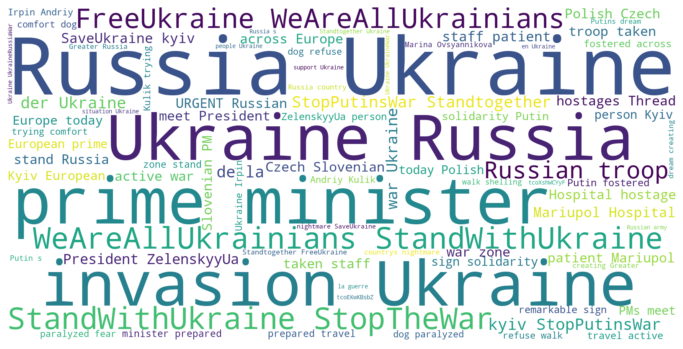

In [23]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='viridis',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df['Tweets'])

In [24]:
## create function to compute positive, negative and neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)


In [25]:
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,retweetcount,hashtags,language,coordinates,favorite_count,extractedts,Tweets,Subjectivity,Polarity,Analysis
0,6706531,1084518784004542464,Opoyis,High-quality trusted conversations around news...,New Delhi,51,11504.0,59570.0,2019-01-13 18:33:22.000000,1503521359237951488.0,...,0.0,"[{'text': 'Ukrainian', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:05:30.589243,Ukrainian President Volodymyr Zelensky deliver...,0.000000,0.000000,Neutral
1,6706532,1158485538690588672,alter_bunso,Call me “bunso” and message ka lang. 🔁,National Capital Region,221,4002.0,3011.0,2019-08-05 21:10:50.000000,1503521359284305920.0,...,0.0,[],tl,NaN,3.0,2022-03-15 01:40:56.017229,Hello pala kay kuyang cute sa may last row Hul...,0.533333,0.250000,Positive
2,6706534,27741349,RNS,Driving essential conversation about how relig...,USA,19487,92235.0,81081.0,2009-03-30 22:03:40.000000,1503521360286420992.0,...,2.0,"[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",en,NaN,1.0,2022-03-15 00:33:36.807900,Orthodox priest deacon within Ukraine elsewher...,0.600000,-0.200000,Negative
3,6706535,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,910967.0,311921.0,2009-02-28 08:31:32.000000,1503521360710193152.0,...,0.0,"[{'text': 'Australia', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:03:27.732329,Australia imposing new sanction Russian oliga...,0.151515,0.045455,Positive
4,6706536,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",50,3224.0,59218.0,2011-09-08 02:34:54.000000,1503521361192497152.0,...,0.0,"[{'text': 'Ukraine', 'indices': [27, 35]}, {'t...",en,NaN,0.0,2022-03-15 00:05:30.565579,As ongoing conflict Ukraine drag on African co...,0.380833,0.022222,Positive


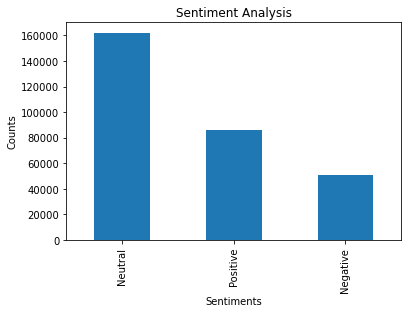

In [26]:
ptweet=df[df.Analysis=='Positive']
ptweet=ptweet['Tweets']
round((ptweet.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
palette='summer'
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:>

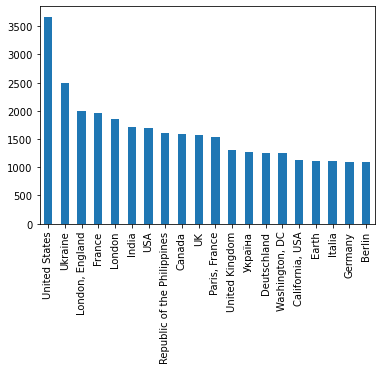

In [27]:
df.location.value_counts()[:20].plot.bar()

In [41]:
!pip install plotly matplotlib seaborn --quiet

In [42]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
## show new Dataframe
df

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,retweetcount,hashtags,language,coordinates,favorite_count,extractedts,Tweets,Subjectivity,Polarity,Analysis
0,6706531,1084518784004542464,Opoyis,High-quality trusted conversations around news...,New Delhi,51,11504.0,59570.0,2019-01-13 18:33:22.000000,1503521359237951488.0,...,0.0,"[{'text': 'Ukrainian', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:05:30.589243,Ukrainian President Volodymyr Zelensky deliver...,0.000000,0.000000,Neutral
1,6706532,1158485538690588672,alter_bunso,Call me “bunso” and message ka lang. 🔁,National Capital Region,221,4002.0,3011.0,2019-08-05 21:10:50.000000,1503521359284305920.0,...,0.0,[],tl,NaN,3.0,2022-03-15 01:40:56.017229,Hello pala kay kuyang cute sa may last row Hul...,0.533333,0.250000,Positive
2,6706534,27741349,RNS,Driving essential conversation about how relig...,USA,19487,92235.0,81081.0,2009-03-30 22:03:40.000000,1503521360286420992.0,...,2.0,"[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",en,NaN,1.0,2022-03-15 00:33:36.807900,Orthodox priest deacon within Ukraine elsewher...,0.600000,-0.200000,Negative
3,6706535,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,910967.0,311921.0,2009-02-28 08:31:32.000000,1503521360710193152.0,...,0.0,"[{'text': 'Australia', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:03:27.732329,Australia imposing new sanction Russian oliga...,0.151515,0.045455,Positive
4,6706536,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",50,3224.0,59218.0,2011-09-08 02:34:54.000000,1503521361192497152.0,...,0.0,"[{'text': 'Ukraine', 'indices': [27, 35]}, {'t...",en,NaN,0.0,2022-03-15 00:05:30.565579,As ongoing conflict Ukraine drag on African co...,0.380833,0.022222,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298519,7190740,1216083847047237632,niner_raccoon,#PutinIsAWarCriminal #SaveUkraine || ❤ cats #S...,ARKET.com 🇧🇪🇪🇺,236,346.0,94751,2020-01-11 19:46:11.000000,1503883740992442370,...,0,"[{'text': 'SlavaUkraini', 'indices': [62, 75]}]",en,NaN,0.0,2022-03-16 00:37:47.339343,A big cosplaying wuss like rest Western leader...,0.050000,0.000000,Neutral
298520,7190742,756579313147908097,DorisBrehm,Hundebesitzerin und selbständig \n - eine toll...,"Baden-Württemberg, Deutschland",179,814.0,184357,2016-07-22 19:58:59.000000,1503883741692846085,...,4,"[{'text': 'Ukraine', 'indices': [47, 55]}]",de,NaN,0.0,2022-03-16 00:07:48.938210,Die Aufnahme der Flüchtlinge au der Ukraine se...,0.000000,0.000000,Neutral
298521,7190743,2354352655,godgoverme,pls reset my dog's and my brain .. thanks,台灣,31,184.0,5699,2014-02-21 06:25:19.000000,1503883741738913795,...,61,"[{'text': 'Kyiv', 'indices': [35, 40]}]",en,NaN,0.0,2022-03-16 00:07:48.930097,During visit Kyiv also thought prayer Benjamin...,0.425000,0.375000,Positive
298522,7190744,1313475047147868161,Kish141,♏ \nbiot.,"Libona, Northern Mindanao",316,149.0,3863,2020-10-06 13:45:28.000000,1503883741952847872,...,0,[],tl,NaN,0.0,2022-03-16 00:42:26.725707,krismyrh ikaw rajud among manok diri p goo na ...,0.000000,0.000000,Neutral


In [46]:
## create function to compute positive, negative and neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [47]:
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,retweetcount,hashtags,language,coordinates,favorite_count,extractedts,Tweets,Subjectivity,Polarity,Analysis
0,6706531,1084518784004542464,Opoyis,High-quality trusted conversations around news...,New Delhi,51,11504.0,59570.0,2019-01-13 18:33:22.000000,1503521359237951488.0,...,0.0,"[{'text': 'Ukrainian', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:05:30.589243,Ukrainian President Volodymyr Zelensky deliver...,0.000000,0.000000,Neutral
1,6706532,1158485538690588672,alter_bunso,Call me “bunso” and message ka lang. 🔁,National Capital Region,221,4002.0,3011.0,2019-08-05 21:10:50.000000,1503521359284305920.0,...,0.0,[],tl,NaN,3.0,2022-03-15 01:40:56.017229,Hello pala kay kuyang cute sa may last row Hul...,0.533333,0.250000,Positive
2,6706534,27741349,RNS,Driving essential conversation about how relig...,USA,19487,92235.0,81081.0,2009-03-30 22:03:40.000000,1503521360286420992.0,...,2.0,"[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",en,NaN,1.0,2022-03-15 00:33:36.807900,Orthodox priest deacon within Ukraine elsewher...,0.600000,-0.200000,Negative
3,6706535,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,45,910967.0,311921.0,2009-02-28 08:31:32.000000,1503521360710193152.0,...,0.0,"[{'text': 'Australia', 'indices': [0, 10]}, {'...",en,NaN,0.0,2022-03-15 00:03:27.732329,Australia imposing new sanction Russian oliga...,0.151515,0.045455,Positive
4,6706536,369869874,ORFMumbai,"Non–partisan, independent analyses on security...","Nariman Point, Mumbai, India",50,3224.0,59218.0,2011-09-08 02:34:54.000000,1503521361192497152.0,...,0.0,"[{'text': 'Ukraine', 'indices': [27, 35]}, {'t...",en,NaN,0.0,2022-03-15 00:05:30.565579,As ongoing conflict Ukraine drag on African co...,0.380833,0.022222,Positive


In [49]:
#Formating dataframe into CSV file.

In [48]:
df.to_csv('TwitterFinal_Dataset')